In [1]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from math import floor, ceil
from tqdm import tnrange, tqdm_notebook
import pandas as pd

In [2]:
class COCODatasetInfo():
    def __init__(self, annotations_file):
        self.coco_json = COCO(annotations_file)
        
        # Get image IDs for all images in dataset
        self.imgIds = self.coco_json.getImgIds()
        self.images = self.coco_json.loadImgs(ids = self.imgIds)
        
        self.num_annotations = list()
        self.num_areas = list()

        for x in range(len(self.imgIds)):
            # Get annotation IDs pertaining to image
            annIds = self.coco_json.getAnnIds(imgIds = self.imgIds[x])

            # Get all annotations pertaining to image
            annotations = self.coco_json.loadAnns(ids = annIds)

            # Add number of annotations to annotations list
            self.num_annotations.append(len(annotations))
            
            for annotation in annotations:
                if annotation["area"] > 166:
                    self.num_areas.append(int(annotation["area"]))
        
        print("Max in self.num_areas: {}".format(max(self.num_areas)))
        
        counter = 0
        num = self.num_areas[0] 

        for i in self.num_areas: 
            curr_frequency = self.num_areas.count(i) 
            if(curr_frequency> counter): 
                counter = curr_frequency 
                num = i 

        self.most_frequent_area = num 
        
        self.most_frequent_area_freq = 0
        
        for area in self.num_areas:
            if self.most_frequent_area == area:
                self.most_frequent_area_freq = self.most_frequent_area_freq + 1
        
        self.min_dim = np.inf
        self.max_dim = 0

        for image in self.images:
            if image["height"] < self.min_dim:
                self.min_dim = image["height"]
            if image["width"] < self.min_dim:
                self.min_dim = image["width"]
            if image["height"] > self.max_dim:
                self.max_dim = image["height"]
            if image["width"] > self.min_dim:
                self.max_dim = image["width"]
        
        while self.min_dim / 2**6 != int(self.min_dim / 2**6):
            self.min_dim = self.min_dim + 1

        while self.max_dim / 2**6 != int(self.max_dim / 2**6):
            self.max_dim = self.max_dim + 1
        
    def annsPerImage(self):
        objects = [str(i) for i in range(len(self.imgIds))]
        y_pos = np.arange(len(objects))

        plt.bar(y_pos, self.num_annotations)
        plt.tick_params( axis='x', which='both', bottom=False, top=False, labelbottom=False ) 
        plt.ylabel('Number of Annotations')
        plt.title('Annotations Count Per Image')

        plt.show()
    
    def annsHistogram(self, figsize = None):
        
        if figsize:
            plt.figure(figsize = figsize)
        plt.hist(self.num_annotations, edgecolor='black', linewidth=1.2, bins = len(self.num_annotations))
        plt.xlabel("Number of Annotations")
        plt.ylabel("Frequency of Annotation Count")
        plt.show()
    
    def areaHistogram(self, figsize = None, max_area = None):
        
        if max_area is None:
            max_area = max(self.num_areas)
        
        if figsize:
            plt.figure(figsize = figsize)
        
        my_list = list()
        
        for area in self.num_areas:
            if area <= max_area:
                my_list.append(area)
            
        plt.hist(my_list, edgecolor='black', linewidth=1.2, bins = len(self.num_areas))
        plt.xlabel("Area")
        plt.ylabel("Frequency of Area")
        
        # Code used to plot out individual figures
        plt.figure(figsize=(30, 50))
        plt.show()        
    
    def getDatapoints(self):
        df = pd.DataFrame(np.array([[len(self.images), sum(self.num_annotations), int(max(self.num_annotations)), int(min(self.num_annotations)), int(sum(self.num_annotations) / len(self.num_annotations)), self.min_dim, self.max_dim, int(min(self.num_areas)), int(max(self.num_areas)), int(sum(self.num_areas) / len(self.num_areas)), int(self.most_frequent_area), int(self.most_frequent_area_freq)]]), columns = ["Num Images", "Num Annotations", "Max Annotations", "Min Annotations", "Average Annotations Per Image", "Img Min Dim", "Img Max Dim", "Min Area", "Max Area", "Avg Area", "Most Frequent Area", "Most Frequent Area Frequency"])
        blankIndex = [''] * len(df)
        df.index = blankIndex
        return df
    
    def getNumAreas(self):
        print(sorted(self.num_areas))
    
    def areaLineGraph(self, red_dot = False, max_value = None, figsize = None):
        
        if max_value is None:
            max_value = max(self.num_areas)
        
        if figsize is None:
            figsize = (18, 16)
        plt.figure(figsize = figsize)
        
        my_list = list()
        
        for area in self.num_areas:
            if area <= max_value:
                if area not in my_list:
                    my_list.append(area)
        
        if red_dot:
            plt.plot(sorted(my_list), 'ro')
        else:
            plt.plot(sorted(my_list))
            
        plt.ylabel('Area')
        plt.show()

In [4]:
datasetInfo = COCODatasetInfo("../datasets/Downtown_Sliced/train/annotations.json")

loading annotations into memory...
Done (t=13.91s)
creating index...
index created!
Max in self.num_areas: 891092


In [5]:
df = datasetInfo.getDatapoints()
df

,Num Images,Num Annotations,Max Annotations,Min Annotations,Average Annotations Per Image,Img Min Dim,Img Max Dim,Min Area,Max Area,Avg Area,Most Frequent Area,Most Frequent Area Frequency
,2065,65595,114,1,31,1152,1280,167,891092,8677,350,43


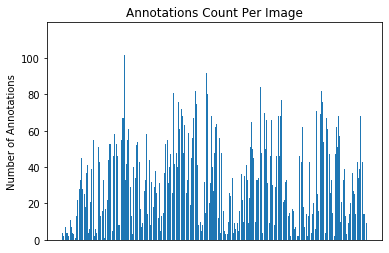

In [6]:
datasetInfo.annsPerImage()

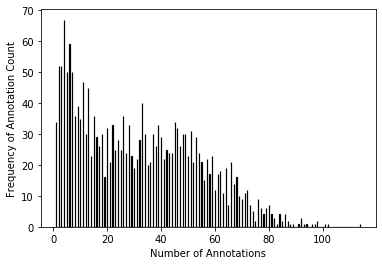

In [7]:
datasetInfo.annsHistogram()

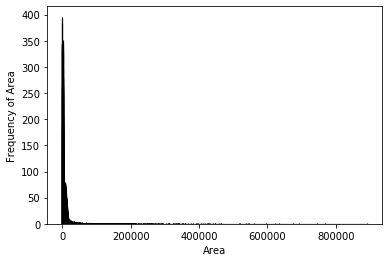

<Figure size 2160x3600 with 0 Axes>

In [8]:
datasetInfo.areaHistogram(max_area = None)

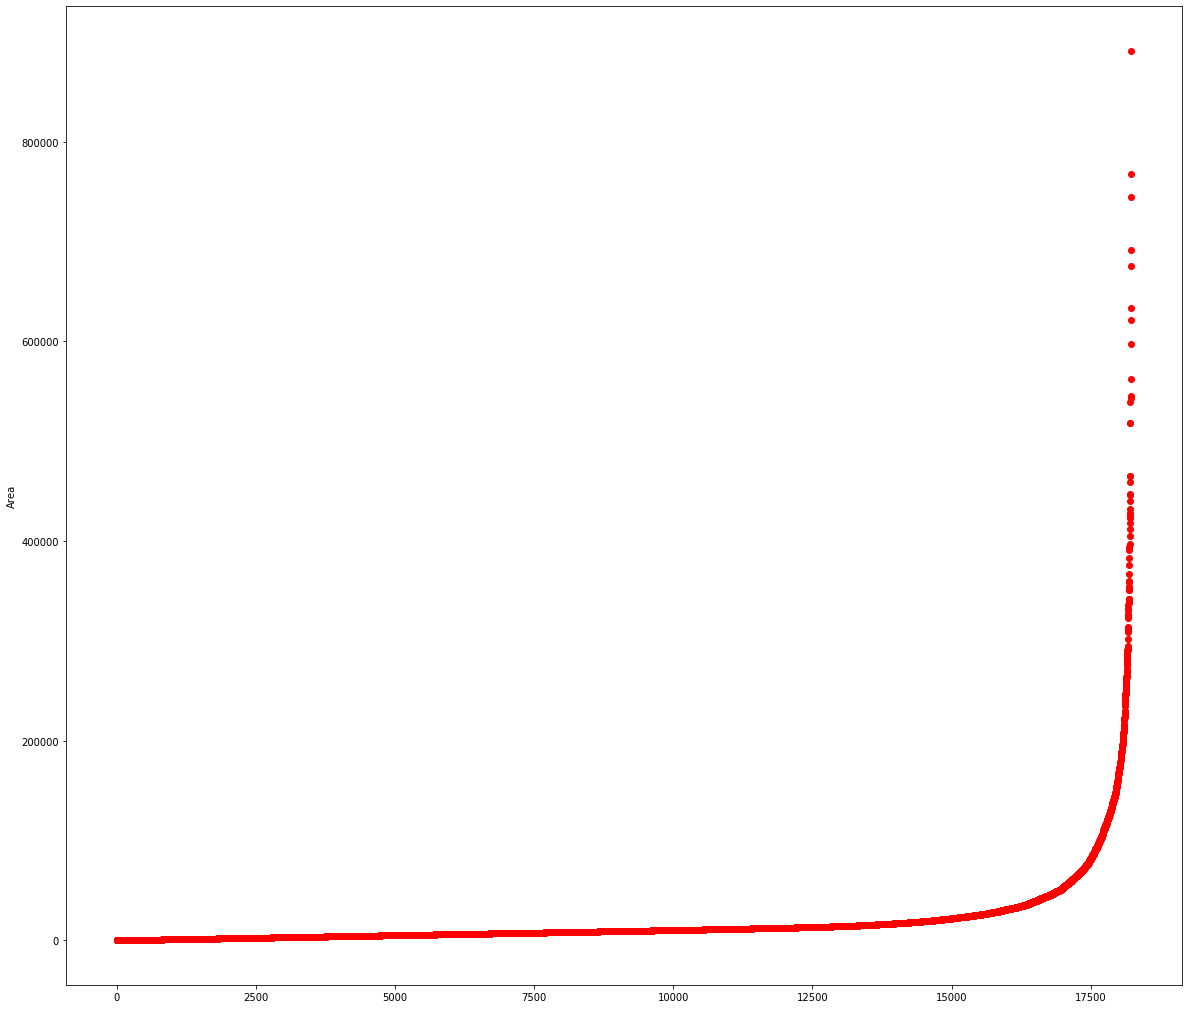

In [9]:
datasetInfo.areaLineGraph(red_dot = True, max_value = None, figsize = (20, 18))